<a href="https://colab.research.google.com/github/abhiraj860/Dominant-Color-Extraction/blob/main/Dominant_Color_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans

In [77]:
img = cv2.imread("/content/sample_data/img.jpg")
img = cv2.resize(img, (int(img.shape[1] / 4), int(img.shape[0] / 4)))
print(img.shape)
print(int(img.shape[0] / 4))
print(int(img.shape[1] / 4))

(300, 400, 3)
75
100


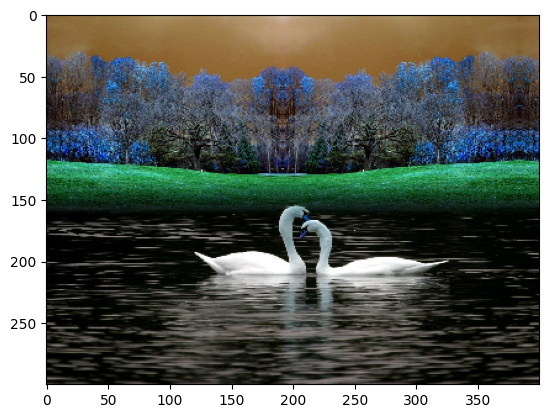

In [78]:
plt.imshow(img)
plt.show() # BGR format channel by default

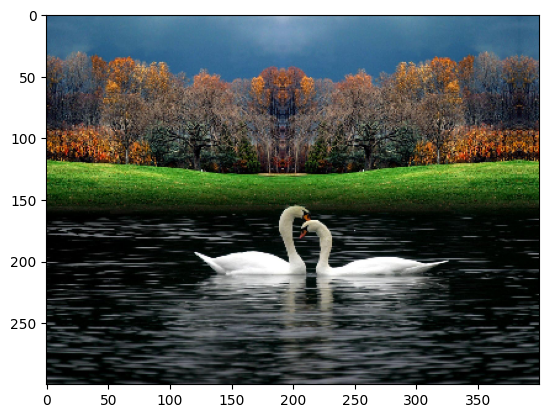

In [79]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conver to RGB image
plt.imshow(img)
plt.show()

In [80]:
X = img.reshape((-1, 3))
print(X.shape)

(120000, 3)


In [81]:
k = 10
model = KMeans(n_clusters = k)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [82]:
centroids = model.cluster_centers_

In [83]:
print(centroids)

[[  5.29946707   9.76791224   6.98656777]
 [ 73.06354009  70.59282472  68.16301059]
 [108.28729402 104.14989881 101.74768719]
 [231.26228879 231.4343318  229.31912442]
 [ 35.38555129  41.88746971  33.2983643 ]
 [113.07844244 166.33295711  57.11935666]
 [154.23580388  99.30102623  57.89920182]
 [ 64.17885585 112.31862225 147.29758428]
 [ 60.10567345 111.29991338  29.39822434]
 [143.68747744 154.09635511 157.65698304]]


In [84]:
colors = np.array(centroids, dtype='uint8')

In [85]:
print(colors)

[[  5   9   6]
 [ 73  70  68]
 [108 104 101]
 [231 231 229]
 [ 35  41  33]
 [113 166  57]
 [154  99  57]
 [ 64 112 147]
 [ 60 111  29]
 [143 154 157]]


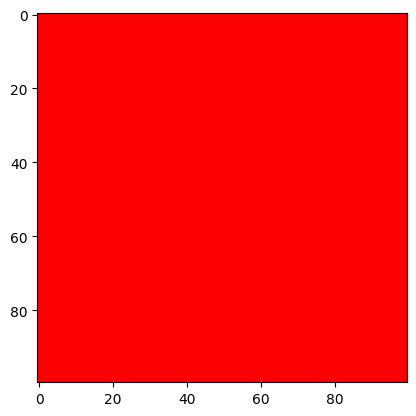

In [86]:
# Color Patch (100, 100, 3) -> Red Color
mat = np.zeros((100, 100, 3), dtype = 'uint8')
mat[:, :, 0] = 250
plt.imshow(mat)
plt.show()

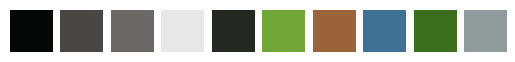

In [87]:
i = 1
for color in colors:
    # print(color)
    plt.subplot(1, k, i)
    plt.axis("off")
    i = i + 1
    mat = np.zeros((100, 100, 3), dtype = 'uint8')
    mat[:, :, :] = color
    plt.imshow(mat)

plt.show()


In [88]:
# Basic Segmentation based upon similar color regions
# Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
print(colors)

[[  5   9   6]
 [ 73  70  68]
 [108 104 101]
 [231 231 229]
 [ 35  41  33]
 [113 166  57]
 [154  99  57]
 [ 64 112 147]
 [ 60 111  29]
 [143 154 157]]


In [89]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [90]:
model.labels_.shape

(120000,)

In [91]:
newImg = np.zeros((X.shape), dtype = 'uint8')
print(newImg.shape)

(120000, 3)


In [92]:
for i in range(newImg.shape[0]):
    newImg[i] = colors[model.labels_[i]]

In [93]:
newImg.shape

(120000, 3)

In [94]:
newImg = newImg.reshape(img.shape)

In [95]:
print(newImg.shape)

(300, 400, 3)


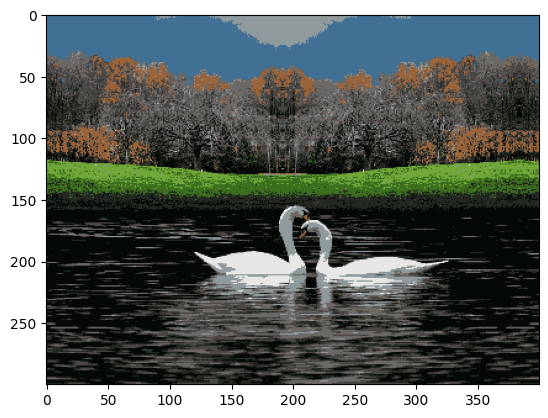

In [96]:
plt.imshow(newImg)